# Stock Data Unsupervised Learning Analysis

## Import the Libraries

In [25]:
import numpy as np
import pandas as pd

pd.reset_option('display.float_format')

import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist

# visualization
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering

# to suppress warnings
import warnings

warnings.filterwarnings('ignore')

## Load the Data

In [26]:
stock = pd.read_csv('stock_data.csv')
data = stock.copy()
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


## Overview of the Data

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [27]:
print('Number of rows in the dataset: ', data.shape[0])
print('Number of columns in the dataset: ', data.shape[1])

Number of rows in the dataset:  340
Number of columns in the dataset:  15


In [28]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


**Observations**

- The data has companies from various economic sectors.
- Many companies have a negative price change, indicating that the stock price of these companies fell over 13 weeks.
- Many companies have a negative net income, indicating that these companies incurred losses in the previous quarter.

### Checking the data types of the columns for the dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- `Ticker Symbol`, `Security`, `GICS Sector`, and `GICS Sub Industry` are categorical variables.
- All the other columns in the data are numeric in nature.

### Checking for duplicate rows and the missing values in the dataset

In [30]:
print('Number of duplicate rows in the dataset: ', data.duplicated().sum())

Number of duplicate rows in the dataset:  0


In [31]:
print('Number of rows with missing values: ', data.isnull().any(axis=1).sum())

Number of rows with missing values:  0


- There are no missing values in the data.

### Statistical summary of the data

In [32]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


**Observations**

- There are companies from 11 economic sectors and 104 sub-industry groups in the data.
    - Most of the companies are from the Industrials sector.
- The average current stock price of companies in the data is ~81 dollars.
- Companies in data have witnessed a 4.1% increase in stock price on average.
- Companies have had a net income of 1.5 billion dollars on average.

## Exploratory Data Analysis

### Univariate Analysis

In [33]:
# function to plot the boxplot and histogram for a given column

def histogram_boxplot(data, feature, figsize=(15, 10), dpi=100, kde=False, bins=50):
    """
    Function to plot the histogram and boxplot for a given column
    
    data : dataframe name
    feature : column name for which the histogram and boxplot are to be plotted
    figsize : size of the figure (width, height), in inches
    dpi : resolution of the figure, dots per inch
    kde : whether to plot a gaussian kernel density estimate
    bins : number of equal-width bins in the range
    """

    # create a figure with two subplots
    figs, axs = plt.subplots(2,
                             1,
                             sharex=True,
                             figsize=figsize,
                             dpi=dpi,
                             gridspec_kw={'height_ratios': (0.25, 0.75)}
                             )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=axs[0],
        showmeans=True,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=axs[1],
        bins=bins
    )

    axs[1].axvline(
        data[feature].mean(),
        color='green',
        linestyle='--',
    )

    axs[1].axvline(
        data[feature].median(),
        color='black',
        linestyle='-',
    )



#### Current Price

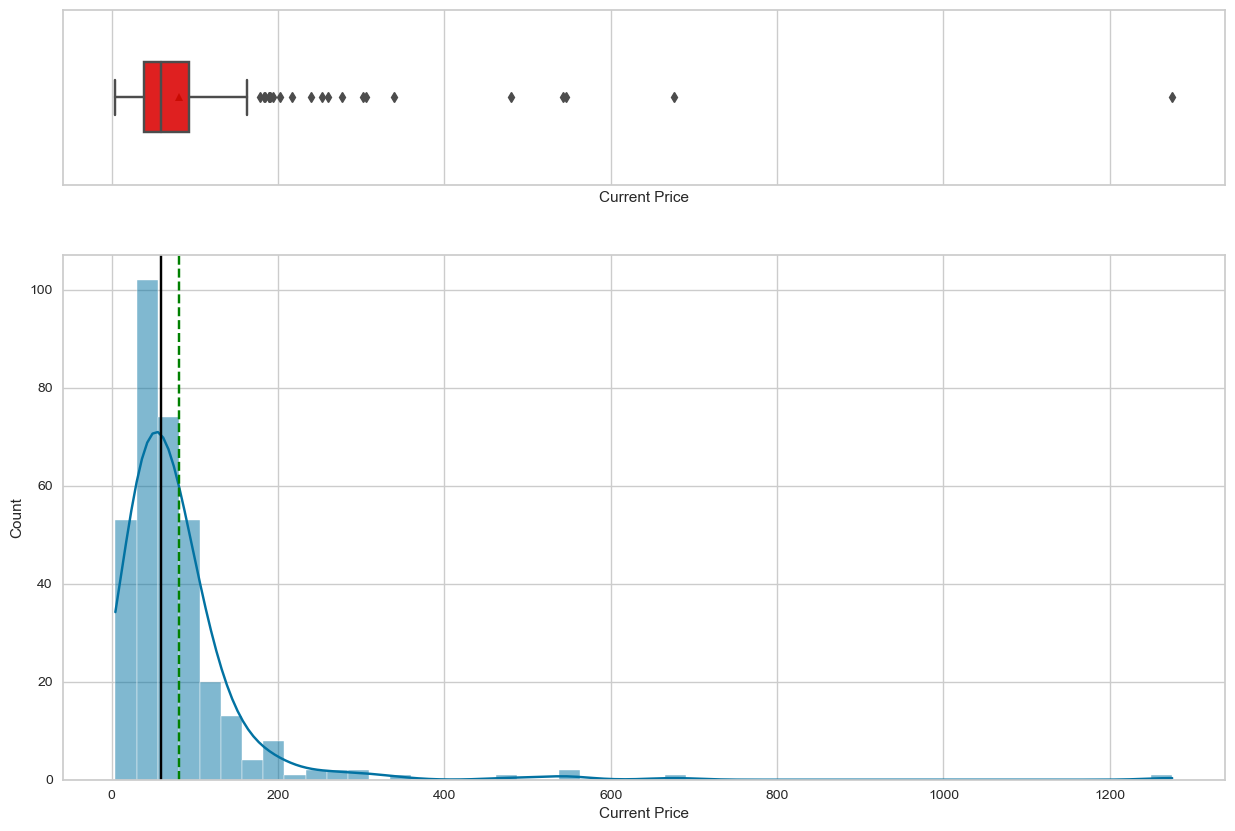

In [34]:
histogram_boxplot(data, 'Current Price', kde=True)

- The distribution is heavily right-skewed and very few stocks have a price of more than 200 dollars.

#### Price Change

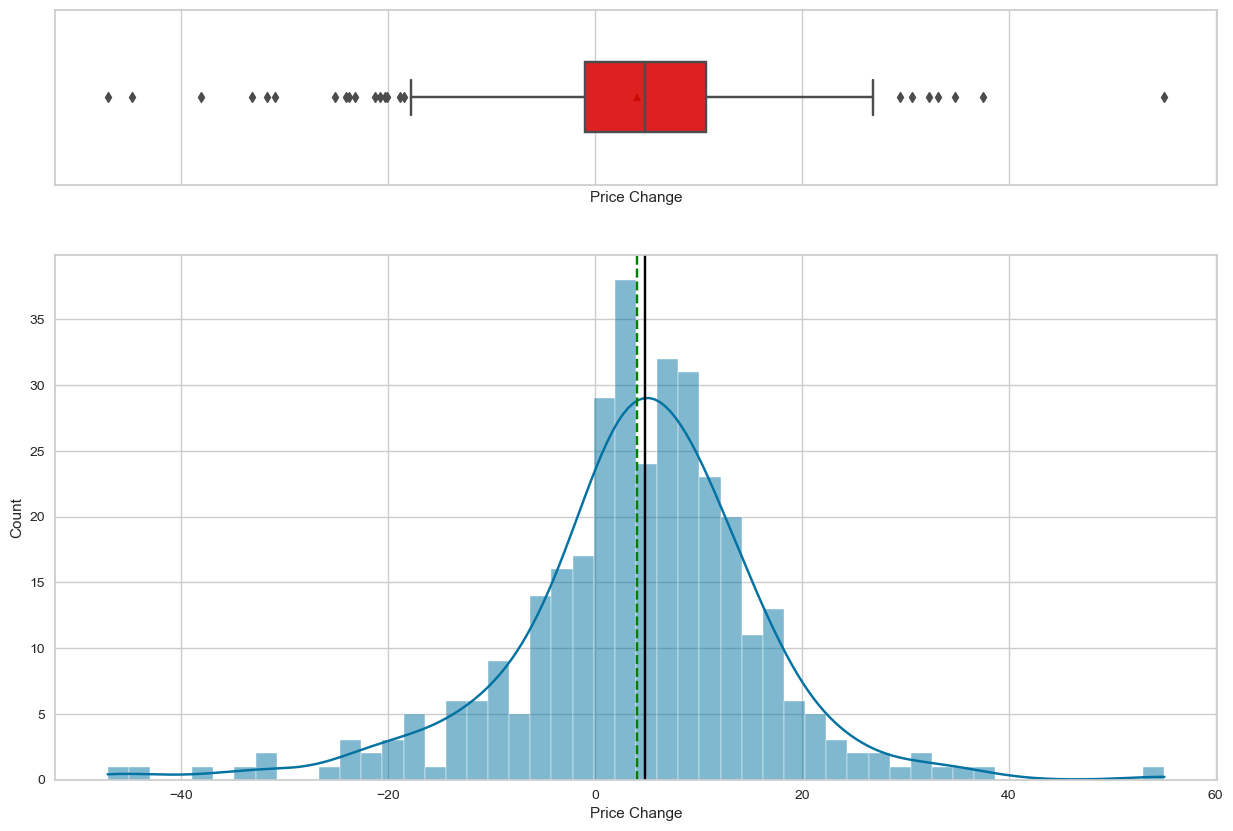

In [35]:
histogram_boxplot(data, 'Price Change', kde=True)

- The distribution of percentage change in stock price is very close to normal.

#### Volatlity

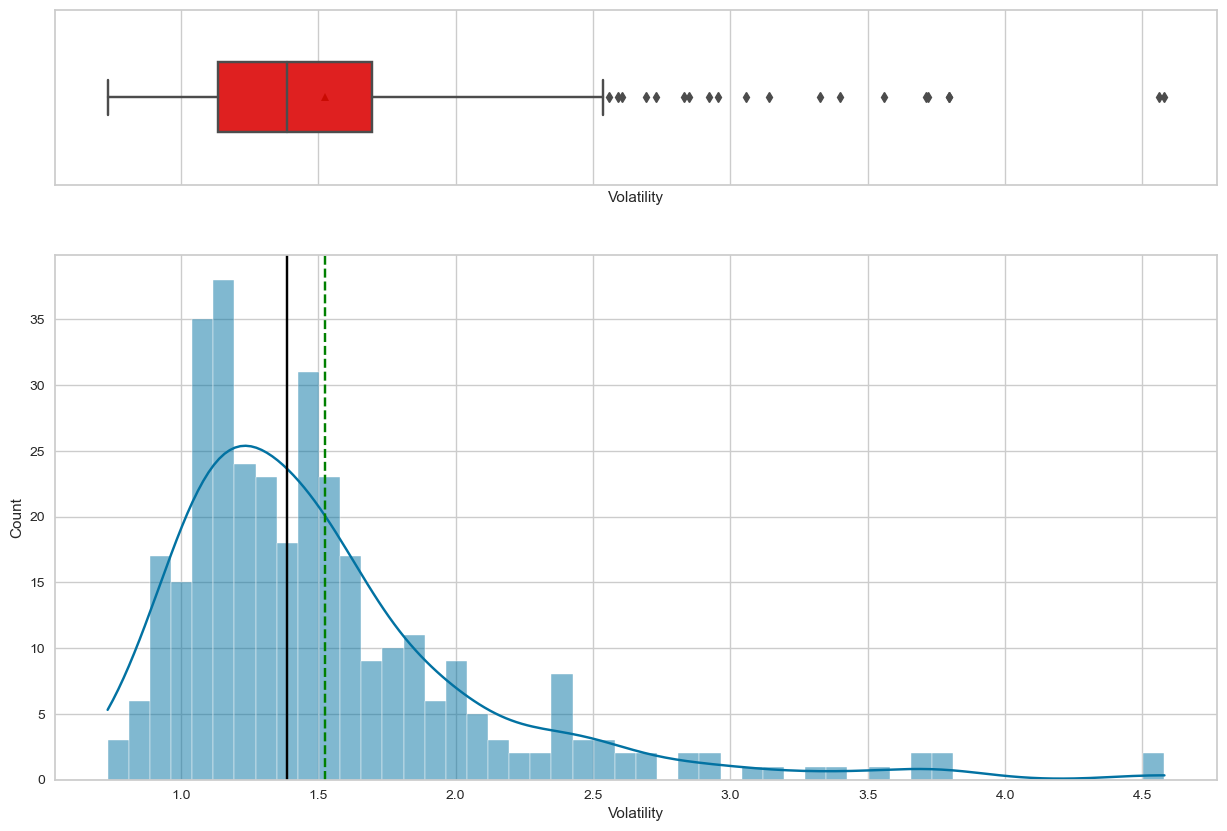

In [36]:
histogram_boxplot(data, 'Volatility', kde=True)

- The distribution is slightly right-skewed and few stocks show very high volatility.

#### ROE

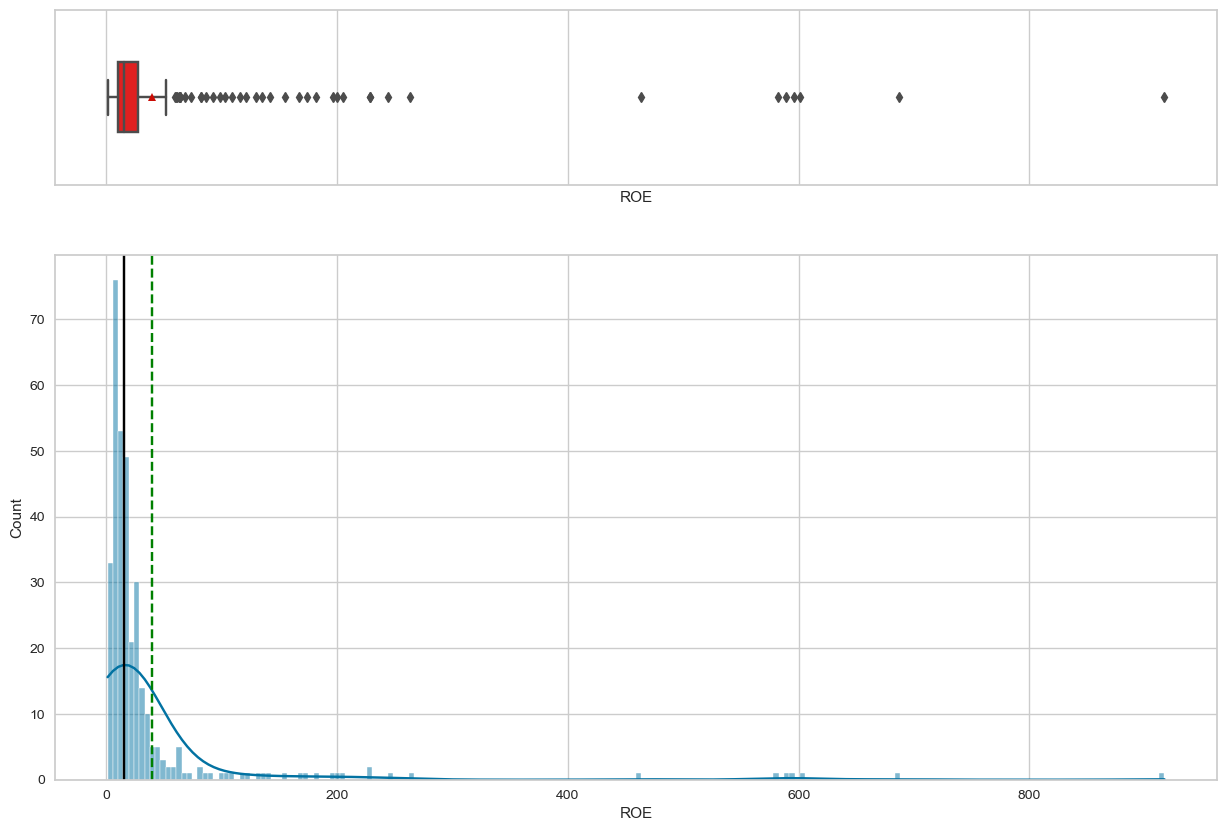

In [37]:
histogram_boxplot(data, 'ROE', kde=True, bins=200)

- The distribution is heavily right-skewed and very few stocks have an ROE of 100 or more.

#### Cash Ratio

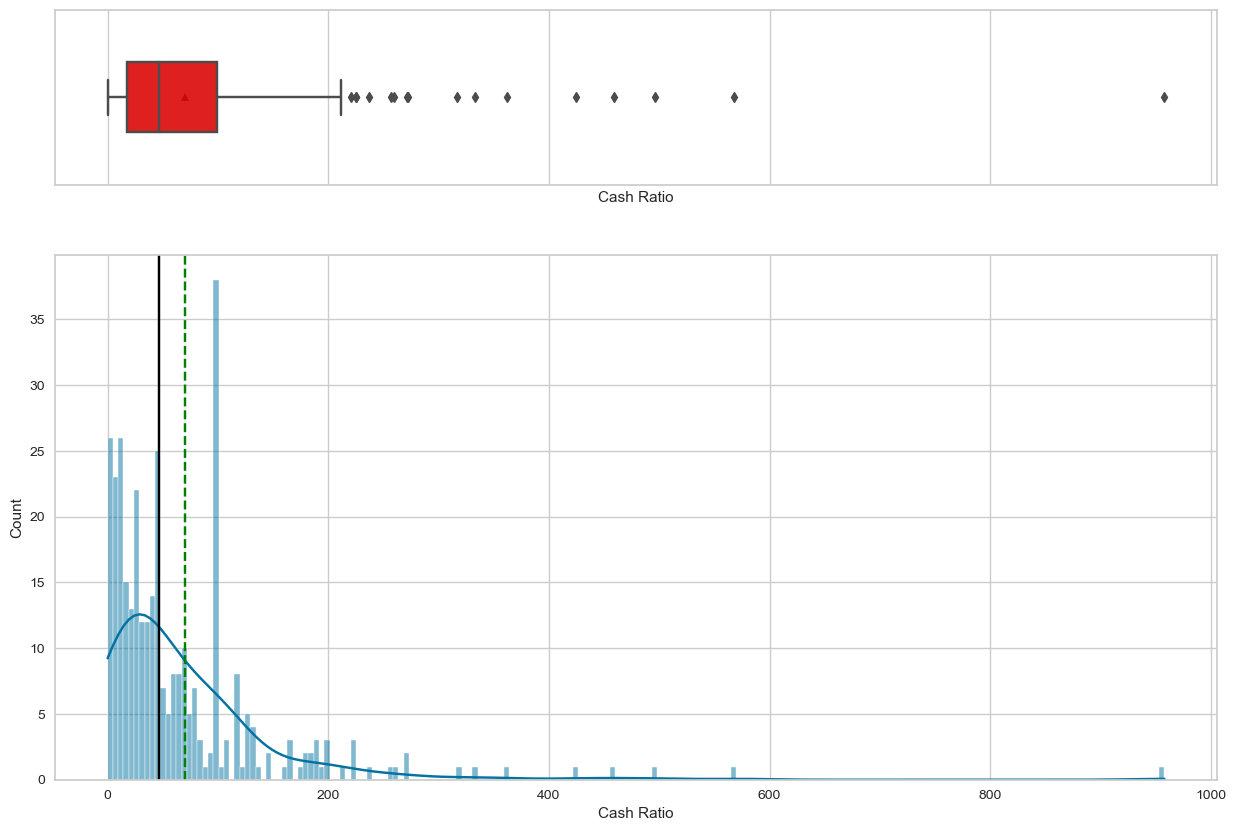

In [38]:
histogram_boxplot(data, 'Cash Ratio', kde=True, bins=200)

- The distribution is right-skewed and very few stocks have a cash ratio of more than 200.

#### Net Cash Flow

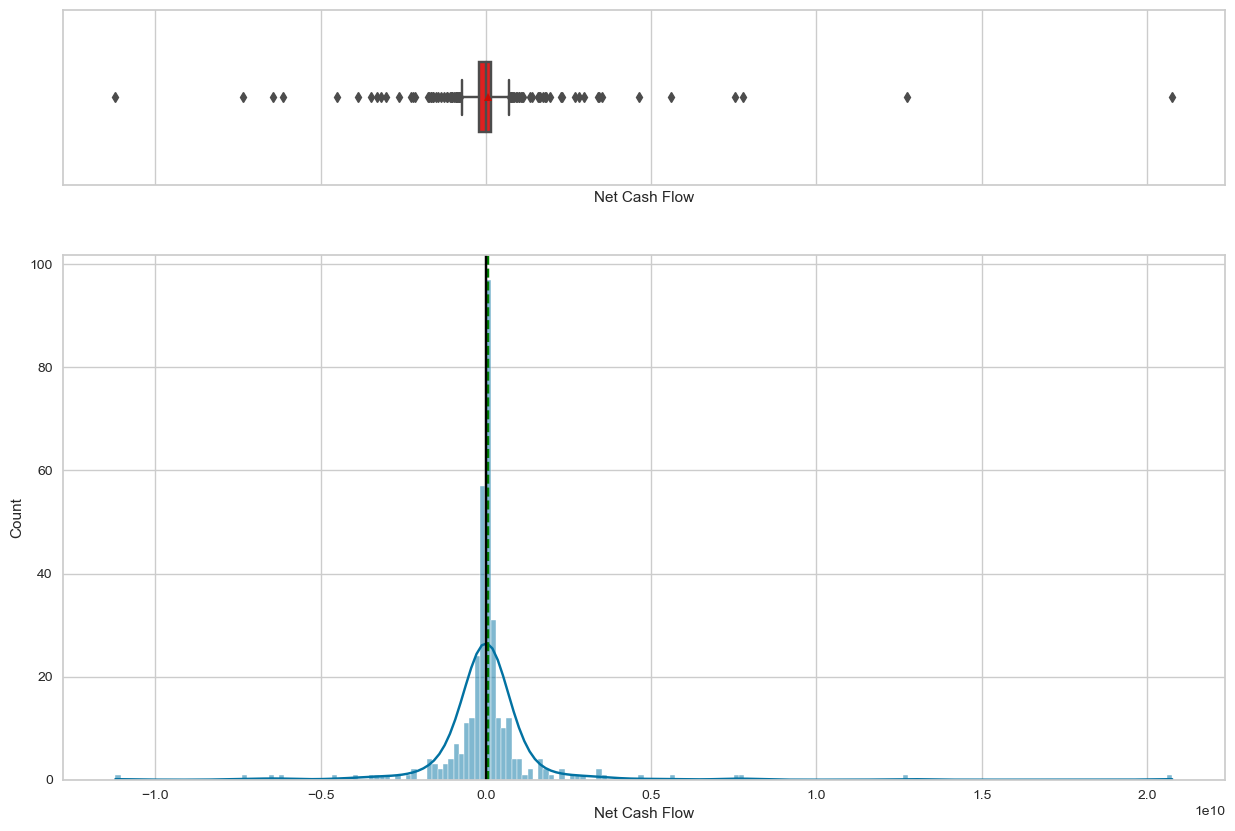

In [39]:
histogram_boxplot(data, 'Net Cash Flow', kde=True, bins=200)

- The distribution is close to normal with a lot of outliers.

#### Net Income

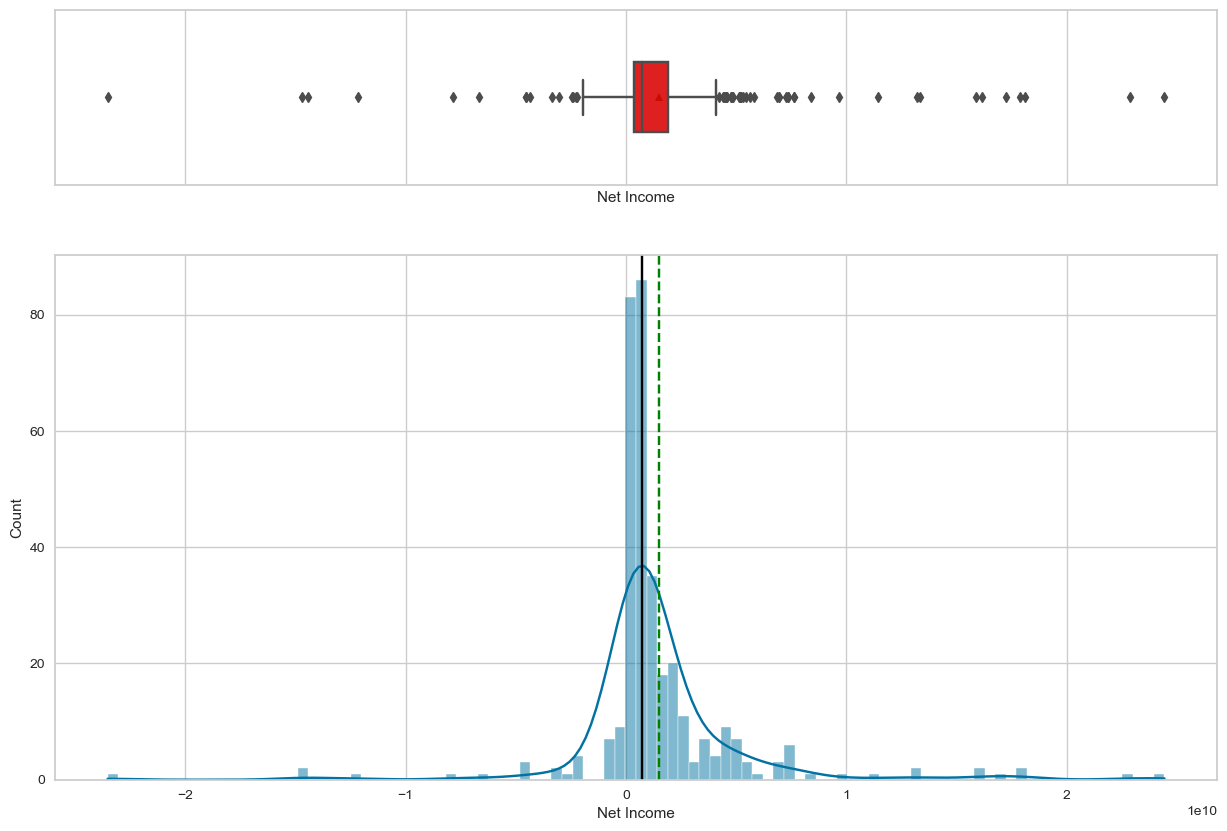

In [40]:
histogram_boxplot(data, 'Net Income', kde=True, bins=100)

- The distribution is close to normal with a lot of outliers.

#### Earnigs Per Share

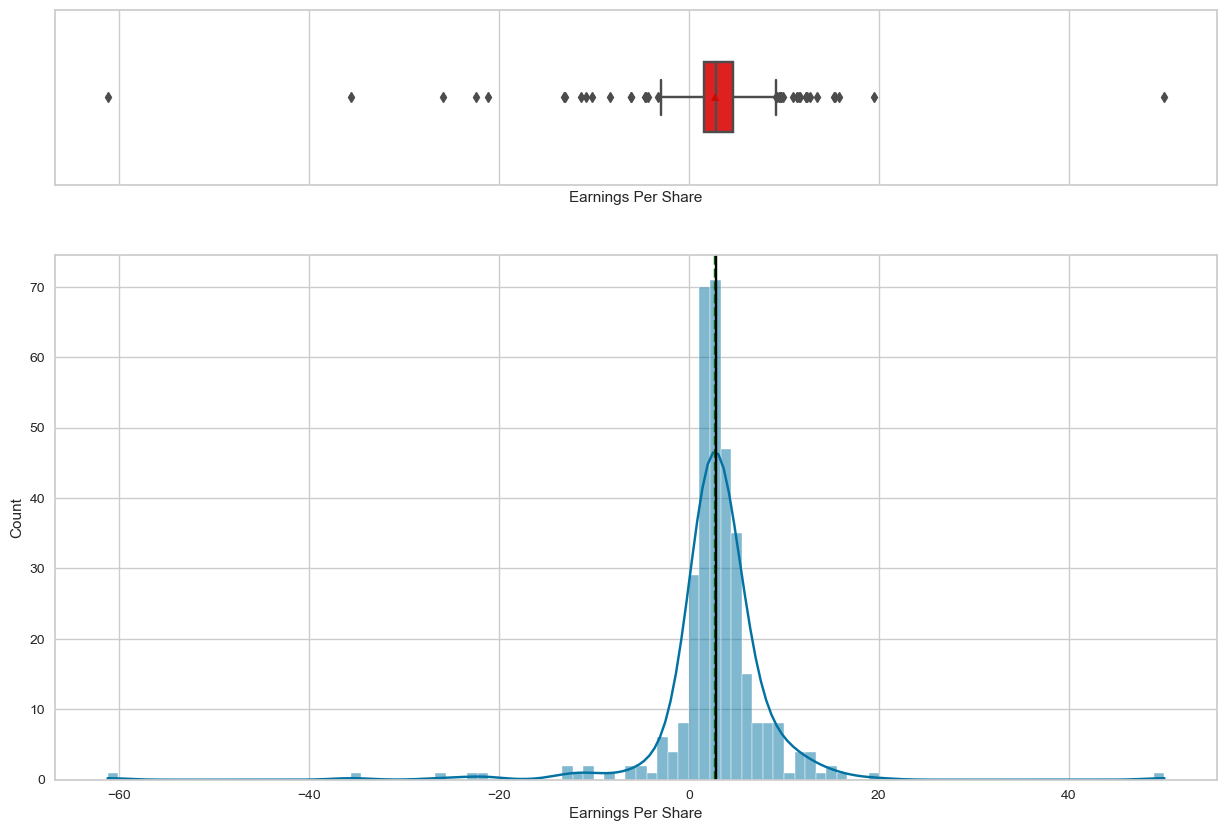

In [41]:
histogram_boxplot(data, 'Earnings Per Share', kde=True, bins=100)

- The distribution is close to normal with a lot of outliers.

#### Estimated Shares Outstanding

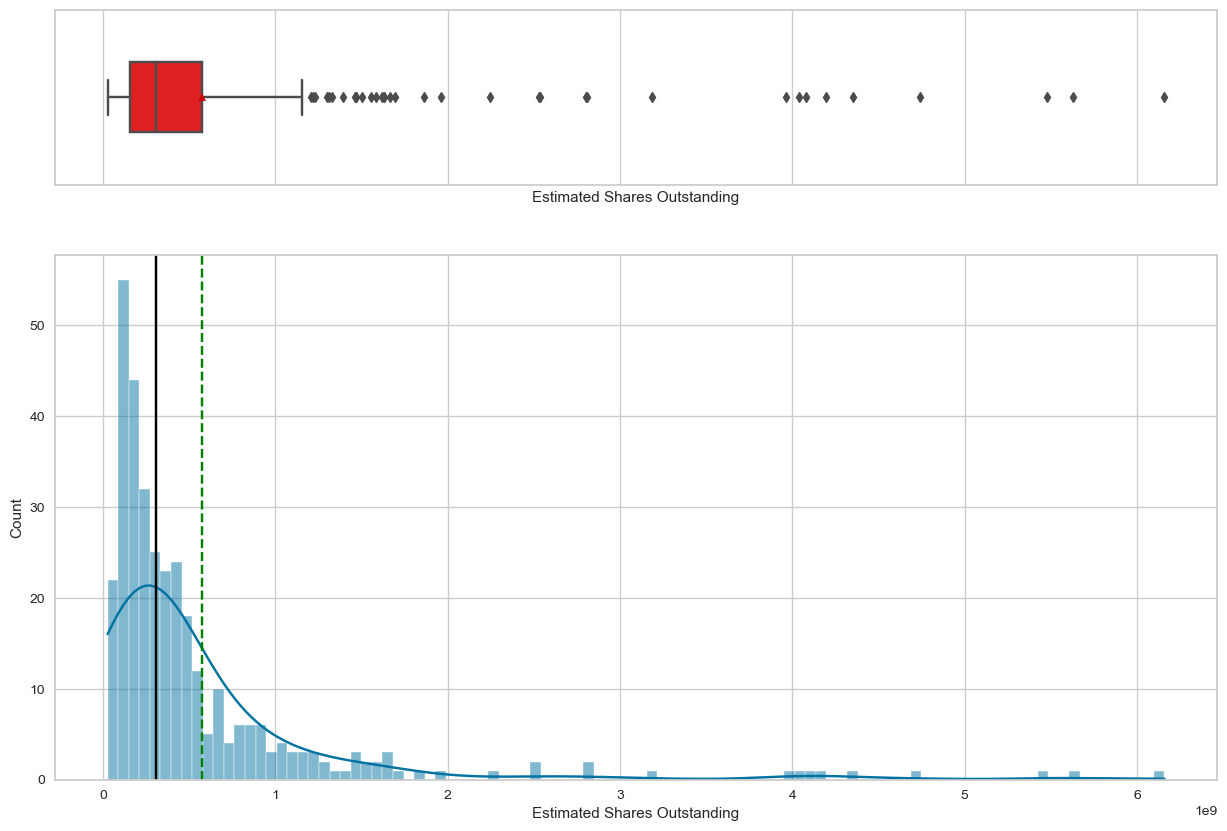

In [42]:
histogram_boxplot(data, 'Estimated Shares Outstanding', kde=True, bins=100)

- The distribution is right-skewed and few companies have more than a billion outstanding shares.

#### P/E Ratio

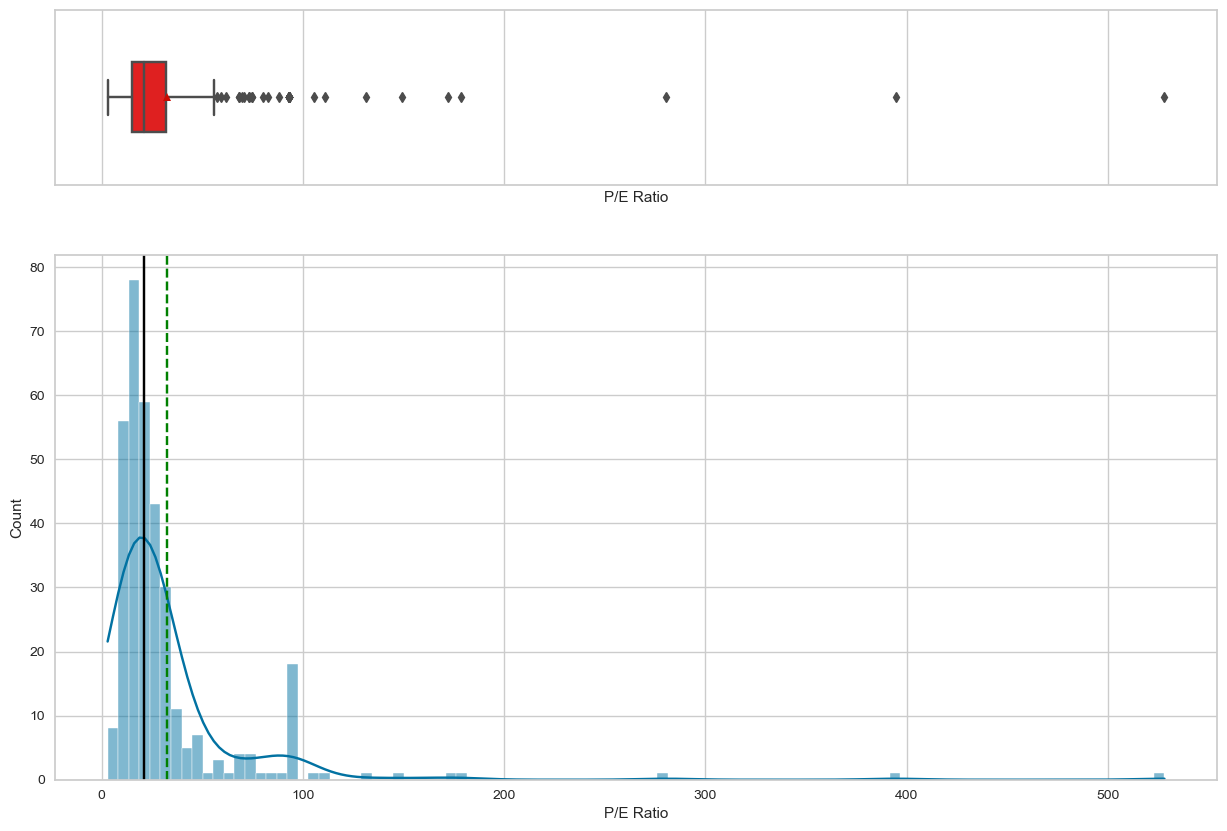

In [43]:
histogram_boxplot(data, 'P/E Ratio', kde=True, bins=100)

- The distribution is right-skewed and very few companies have a P/E ration greater than 100.

#### P/B Ratio

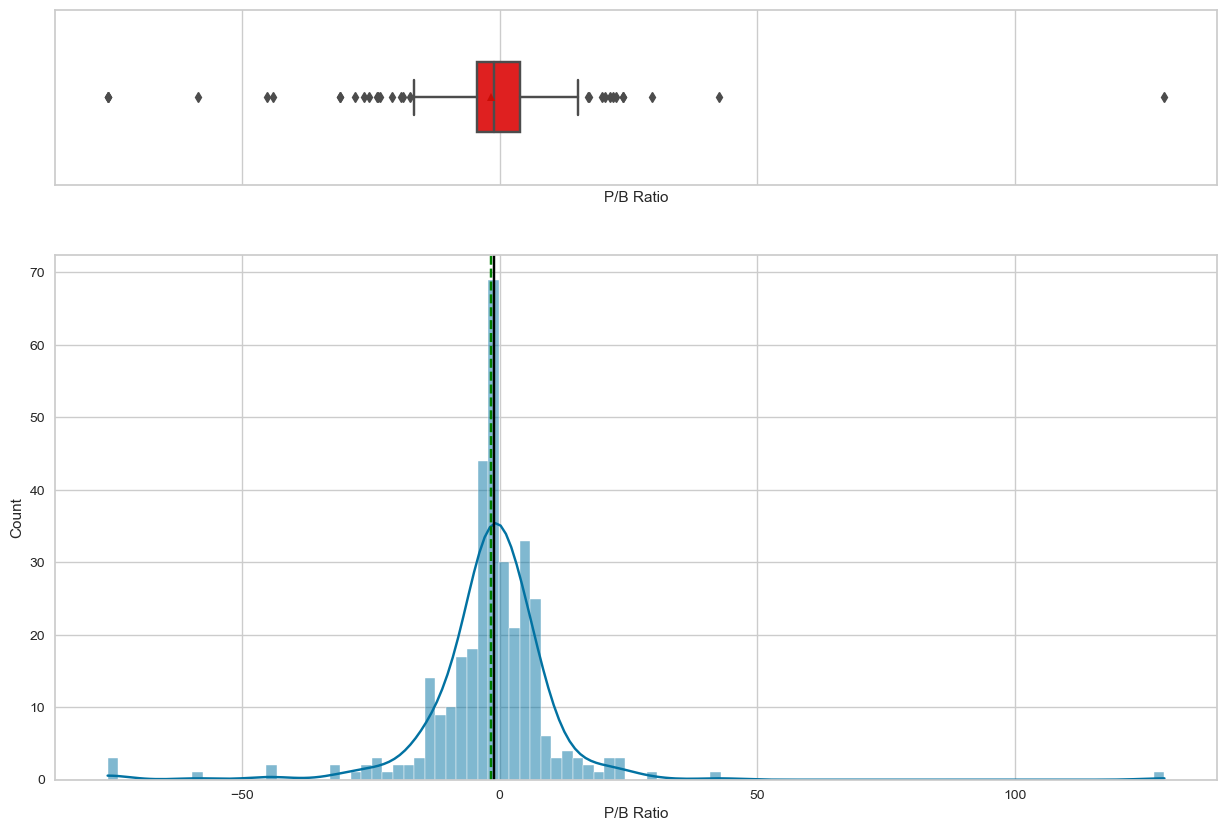

In [44]:
histogram_boxplot(data, 'P/B Ratio', kde=True, bins=100)

- The distribution is close to normal with a few outliers.

In [45]:
# fuction to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None, dpi=100):
    """
    Function to create labeled barplots
    
    data : dataframe name
    feature : column name for which the barplot is to be plotted
    perc : whether to show the percentage values on the bars
    n : number of categories to show on the plot, ordered by frequency
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5), dpi=dpi)
    else:
        plt.figure(figsize=(n + 1, 5), dpi=dpi)

    plt.xticks(rotation=45)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values()
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        # width of the bar
        y = p.get_height()
        # height of the bar

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()


#### Ticker Symbol

#### GICS Sector

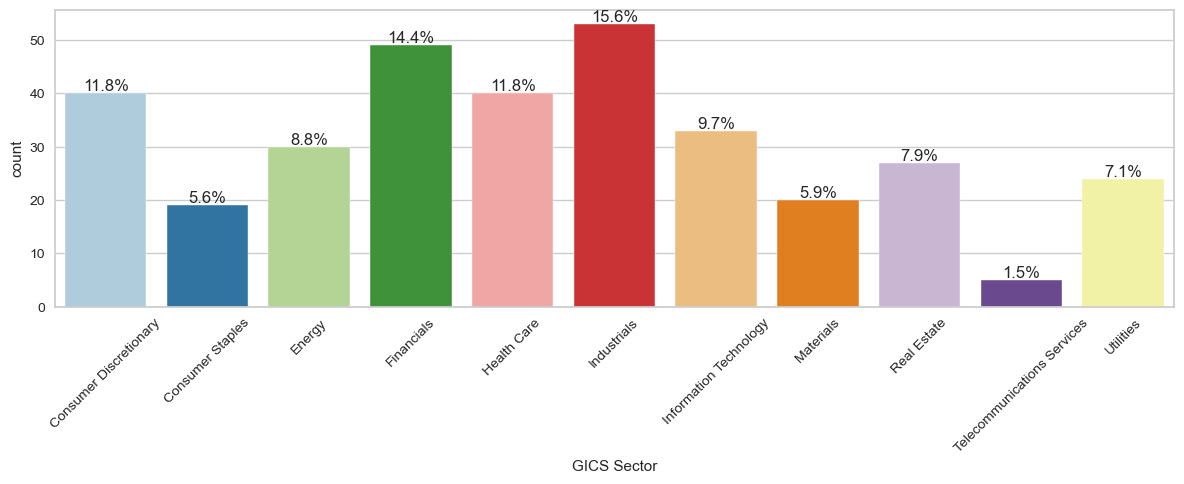

In [46]:
labeled_barplot(data, 'GICS Sector', perc=True)

- 30% of the companies in the data are from Financials and Industrials sectors.
- Telecommunication Services has the least weightage of companies in the data.

#### GICS Sub Industry

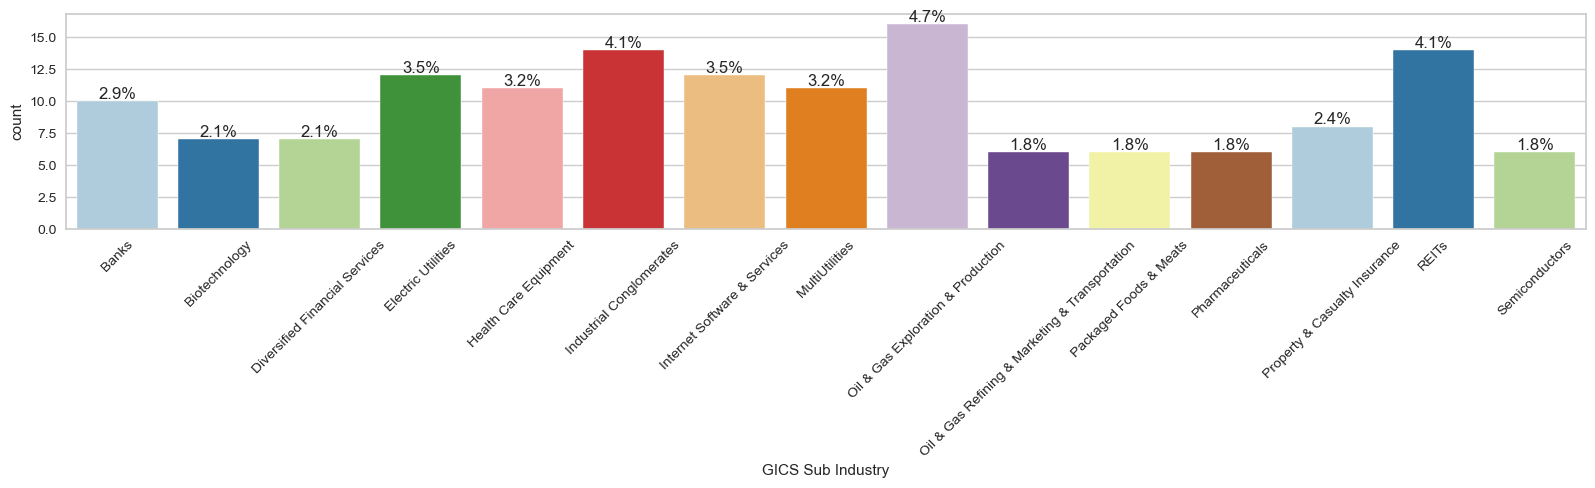

In [47]:
# Top 15 sub-industry groups
labeled_barplot(data, 'GICS Sub Industry', n=15, perc=True)

- Most of the companies in the data belong to the Oil and Gas Exploration and Production sub-industry.

### Bivariate Analysis

In [48]:
plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    data.corr(),
    annot=True,
    cmap='viridis',
    vmin=-1,
    vmax=1,
    fmt='.2f',
)

plt.title('Correlation Heatmap', fontsize=15, weight='bold')
plt.show()

ValueError: could not convert string to float: 'AAL'

<Figure size 1200x800 with 0 Axes>

**Observations**

- None of the variables show a very high correlation with each other.

- The net income of a company is positively correlated with the earnings per share and number of outstanding shares.
    -  This makes sense as the more money a company makes, the more each shareholder will earn and more people will be willing to invest in the company.
    
- Percentage change in price and price volatility are negatively correlated.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)

sns.barplot(
    data=data,
    x='GICS Sector',
    y='Price Change',
    ci=None,
    estimator=np.mean,
    palette='Paired'
)
plt.title('Average Price Change by Economic Sector', fontsize=15, weight='bold')
plt.xlabel('Economic Sector', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.show()

- Stocks from the Healthcare sector witnessed the maximum price increase, with an ~9% increase, on average.
- Stocks from the Energy sector were the only ones to witness a price drop on average.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)

sns.barplot(
    data=data,
    x='GICS Sector',
    y='Cash Ratio',
    ci=None,
    estimator=np.mean,
    palette='Paired'
)

plt.title('Average Cash Ratio by Economic Sector', fontsize=15, weight='bold')
plt.xlabel('Economic Sector', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.show()

- IT sector companies have the highest cash ratio on average, so they are more likely to be able to cover their short-term obligations using only cash and cash equivalents.
- Utilities sector companies have the lowest cash ratio on average, so they are less likely to be able to cover their short-term obligations using only cash and cash equivalents.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

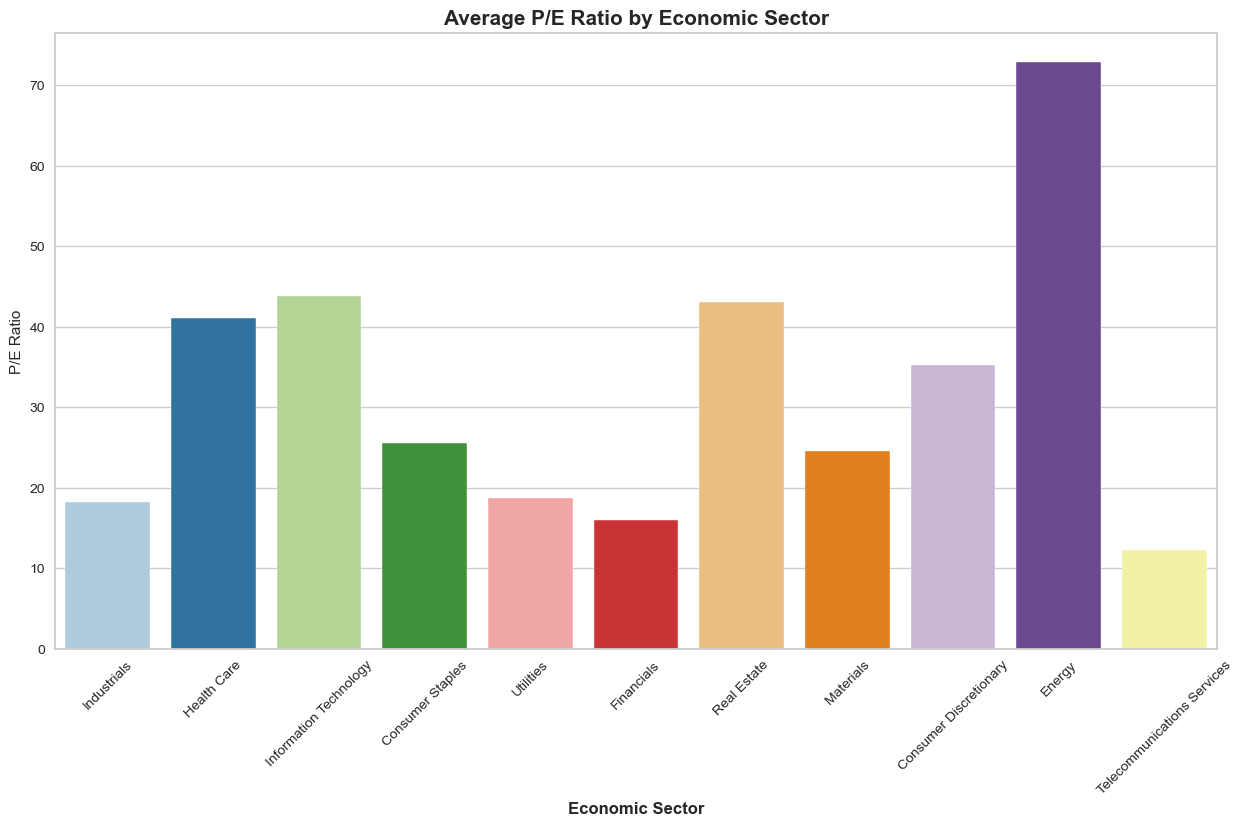

In [49]:
plt.figure(figsize=(15, 8), dpi=100)

sns.barplot(
    data=data,
    x='GICS Sector',
    y='P/E Ratio',
    ci=None,
    estimator=np.mean,
    palette='Paired'
)

plt.title('Average P/E Ratio by Economic Sector', fontsize=15, weight='bold')
plt.xlabel('Economic Sector', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.show()

- The P/E ratio is highest (on average) for the Energy sector companies but they also witness an average price decrease over the past quarter. This might indicate that the stocks of this sector are overvalued.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

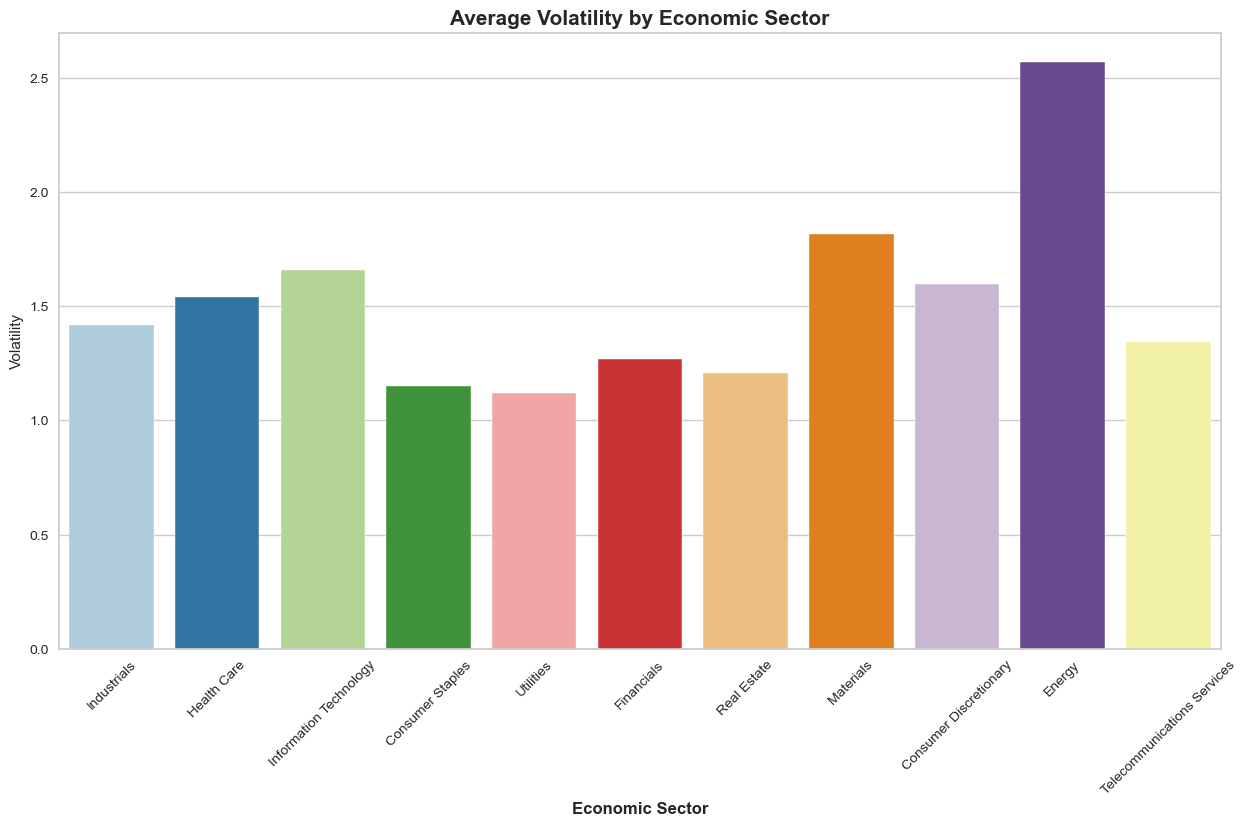

In [50]:
plt.figure(figsize=(15, 8), dpi=100)

sns.barplot(
    data=data,
    x='GICS Sector',
    y='Volatility',
    ci=None,
    estimator=np.mean,
    palette='Paired'
)

plt.title('Average Volatility by Economic Sector', fontsize=15, weight='bold')

plt.xlabel('Economic Sector', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.show()

- Stocks from the Energy sector exhibit high volatility on average, making them riskier investments.
- Consumer Staples and Utilities stocks are less riskier investments.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

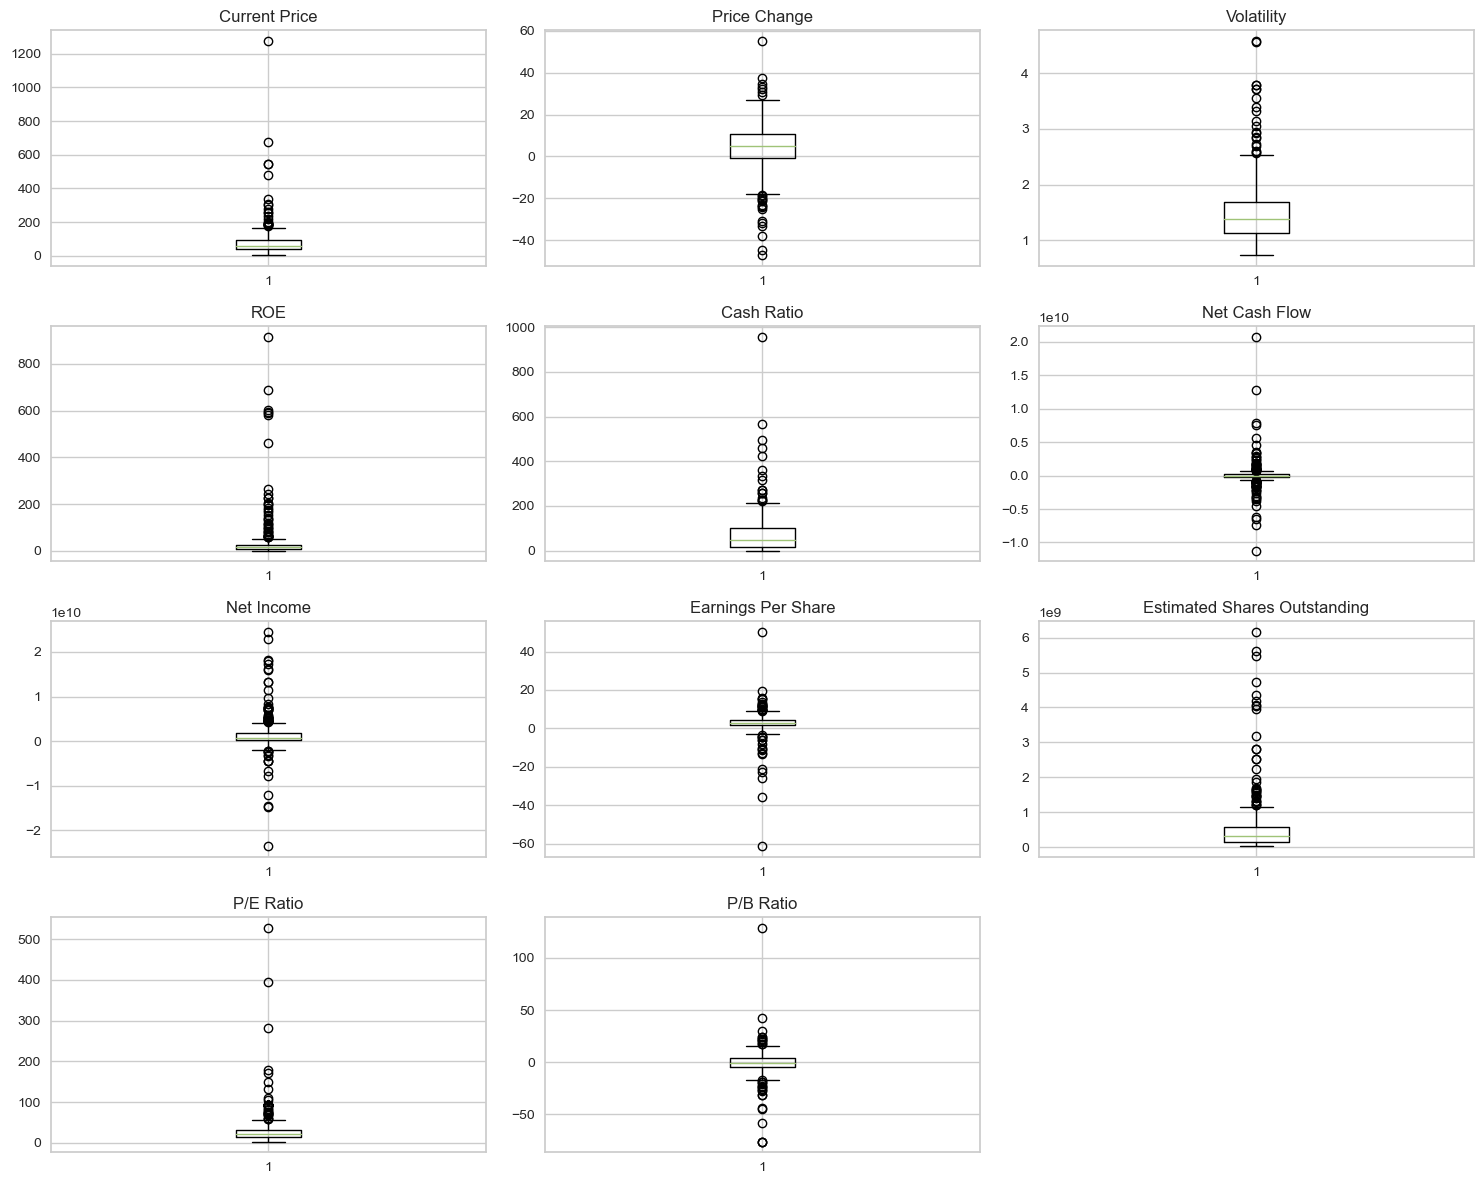

In [51]:
plt.figure(figsize=(15, 12), dpi=100)

numerical_columns = data.select_dtypes(include=np.number).columns

for i, variable in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are some outliers in the data.
- We will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [52]:
scaler = StandardScaler()
subset = data.iloc[:, 4:].copy()
subset_scaled = scaler.fit_transform(subset)

In [53]:
subset_scaled = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


## K-Means Clustering

Determining the optimal number of clusters (K) is a crucial step in K-means clustering. There are several methods to identify the best value for K. Below are some commonly used techniques:

### Elbow Method
1. **Run K-means with different K values**: Typically, start with K=1 and go up to a reasonable number based on your dataset size and domain knowledge.
2. **Calculate Within-Cluster-Sum-of-Squares (WCSS)**: For each K value, calculate the sum of the squared distance between each point and its centroid. Lower WCSS values indicate that the data points are closer to the centroids.
3. **Plot WCSS vs. K**: Plot these WCSS values on a graph where the x-axis represents K, and the y-axis represents the computed WCSS.
4. **Find the 'Elbow'**: Look for the point on the graph where the rate of decrease sharply changes, resembling an "elbow". The K corresponding to this point is usually considered the optimal K.

### Silhouette Method
1. **Run K-means for Different K Values**: Like the elbow method, run the K-means algorithm for different values of K.
2. **Calculate Silhouette Score**: For each K, calculate the silhouette score which ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
3. **Plot Silhouette Score vs. K**: Look for the K value that gives the maximum silhouette score.

### Davies-Bouldin Index
1. **Run K-means for Different K Values**: Similar to above methods.
2. **Calculate Davies-Bouldin Index**: Lower values of Davies-Bouldin index indicate better clustering.
3. **Plot Davies-Bouldin Index vs. K**: Look for the K value that gives the minimum Davies-Bouldin Index.

### Gap Statistics
1. **Run K-means and Create Reference Data**: Run K-means on your real dataset and also on a randomly generated dataset that has no inherent clusters.
2. **Calculate Gap Statistic**: The Gap Statistic compares the performance of clustering on your real dataset to the clustering on the random dataset.
3. **Find Optimal K**: The K with the highest gap statistic is generally the optimal K.

### Cross-Validation
You can also use techniques like cross-validation to see how stable your clusters are across different subsets of your data.

It's often useful to use a combination of these methods to confirm the optimal value for K. After finding it, you can proceed with running the K-means algorithm with that K value for your final model.

### Finding the Optimal Number of Clusters
### Checking Elbow Plot

In [69]:
# The model data
k_means_df = subset_scaled.copy()

Number of clusters:  1 	Distortion:  2.5425069919221697
Number of clusters:  2 	Distortion:  2.382318498894466
Number of clusters:  3 	Distortion:  2.2692367155390745
Number of clusters:  4 	Distortion:  2.175554082632614
Number of clusters:  5 	Distortion:  2.136852169310594
Number of clusters:  6 	Distortion:  2.0713095032364506
Number of clusters:  7 	Distortion:  1.9775989987671811
Number of clusters:  8 	Distortion:  1.9652603012304684
Number of clusters:  9 	Distortion:  1.9311613101229932
Number of clusters:  10 	Distortion:  1.8502089919483546
Number of clusters:  11 	Distortion:  1.824801480357901
Number of clusters:  12 	Distortion:  1.7525839358924042
Number of clusters:  13 	Distortion:  1.722563828836958
Number of clusters:  14 	Distortion:  1.6973594266503265


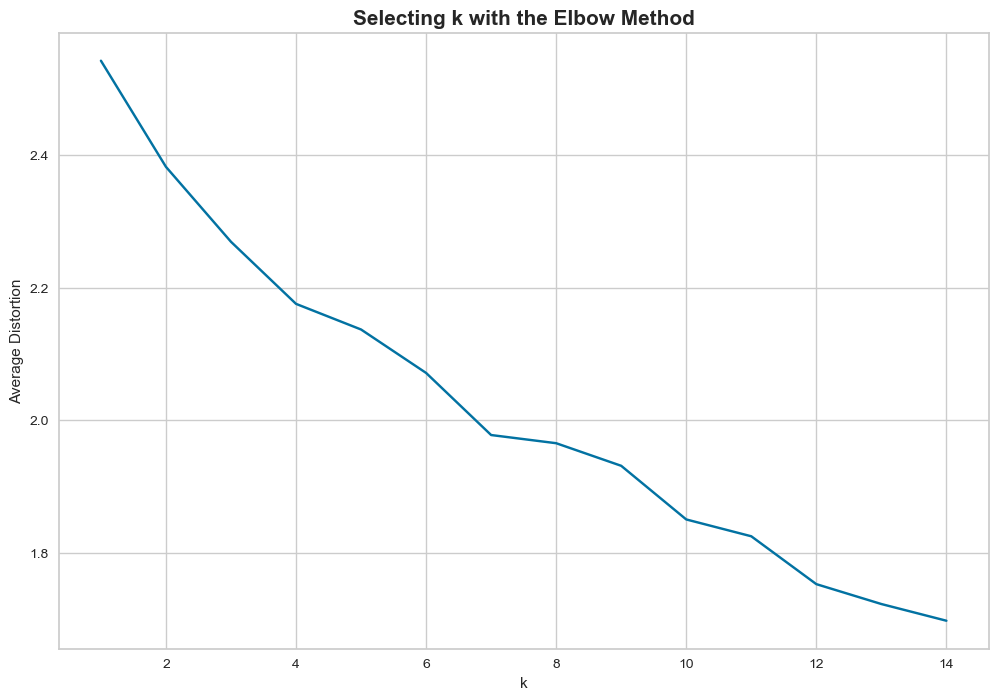

In [55]:
# set a k range to test each k-means model
clusters = range(1, 15)
meanDistortions = []

# test each k value
for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled)

    prediction = model.predict(k_means_df)

    # calculate the distortion
    distortion = (
            sum(
                np.min(
                    cdist(k_means_df, model.cluster_centers_, 'euclidean'),
                    axis=1
                )
            ) / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print('Number of clusters: ', k, '\tDistortion: ', distortion)

plt.figure(figsize=(12, 8), dpi=100)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')

plt.title('Selecting k with the Elbow Method', fontsize=15, weight='bold')

plt.show()

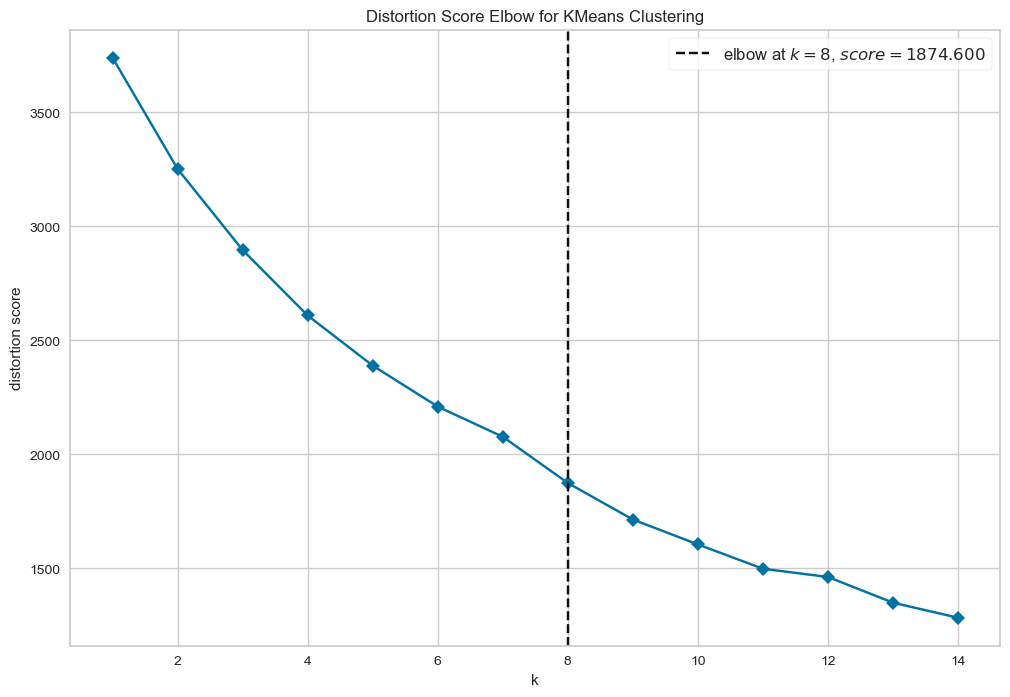

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
model = KMeans(random_state=1)

fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = KElbowVisualizer(model,
                              k=(1, 15),
                              timings=False,
                              fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer
visualizer.show()
# finalize and render the figure

#### Let's check the silhouette score for the clusters.

Number of clusters:  2 	Silhouette Score:  0.43969639509980457
Number of clusters:  3 	Silhouette Score:  0.4644405674779404
Number of clusters:  4 	Silhouette Score:  0.45434371948348606
Number of clusters:  5 	Silhouette Score:  0.43169988466492354
Number of clusters:  6 	Silhouette Score:  0.36698524210914063
Number of clusters:  7 	Silhouette Score:  0.10587349598463779
Number of clusters:  8 	Silhouette Score:  0.40021596082234684
Number of clusters:  9 	Silhouette Score:  0.4051539505522535
Number of clusters:  10 	Silhouette Score:  0.1147132918355368
Number of clusters:  11 	Silhouette Score:  0.16268826704862682
Number of clusters:  12 	Silhouette Score:  0.12883008320005324
Number of clusters:  13 	Silhouette Score:  0.1744804713048242
Number of clusters:  14 	Silhouette Score:  0.17597674098501367


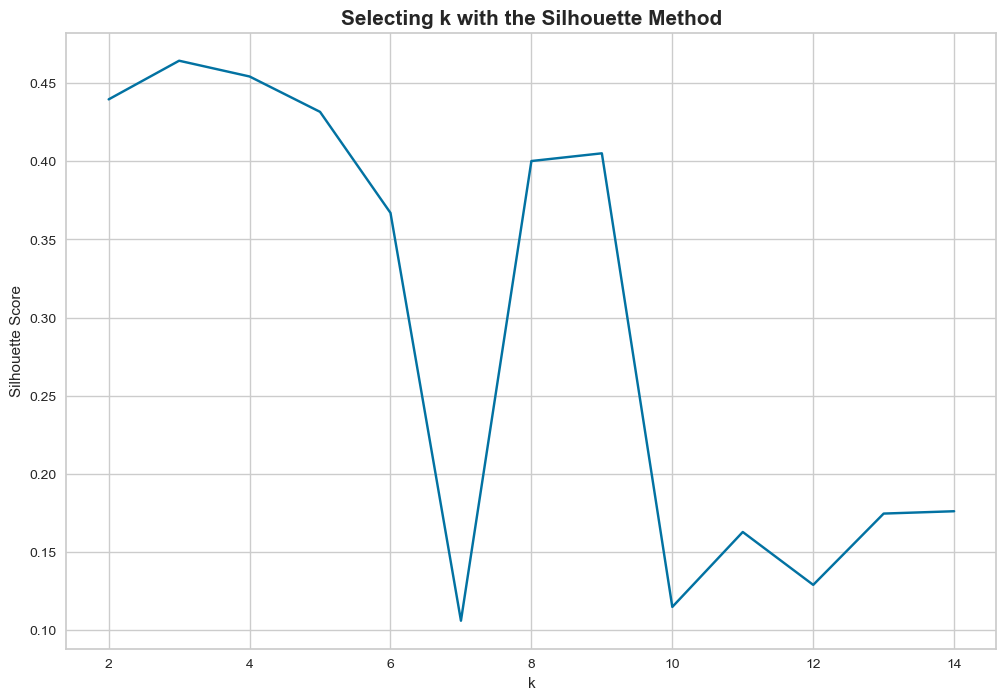

In [57]:
sil_score = []
cluster_list = range(2, 15)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(k_means_df)

    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)

    print('Number of clusters: ', n_clusters, '\tSilhouette Score: ', score)

plt.figure(figsize=(12, 8), dpi=100)
plt.plot(cluster_list, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.title('Selecting k with the Silhouette Method', fontsize=15, weight='bold')

plt.show()

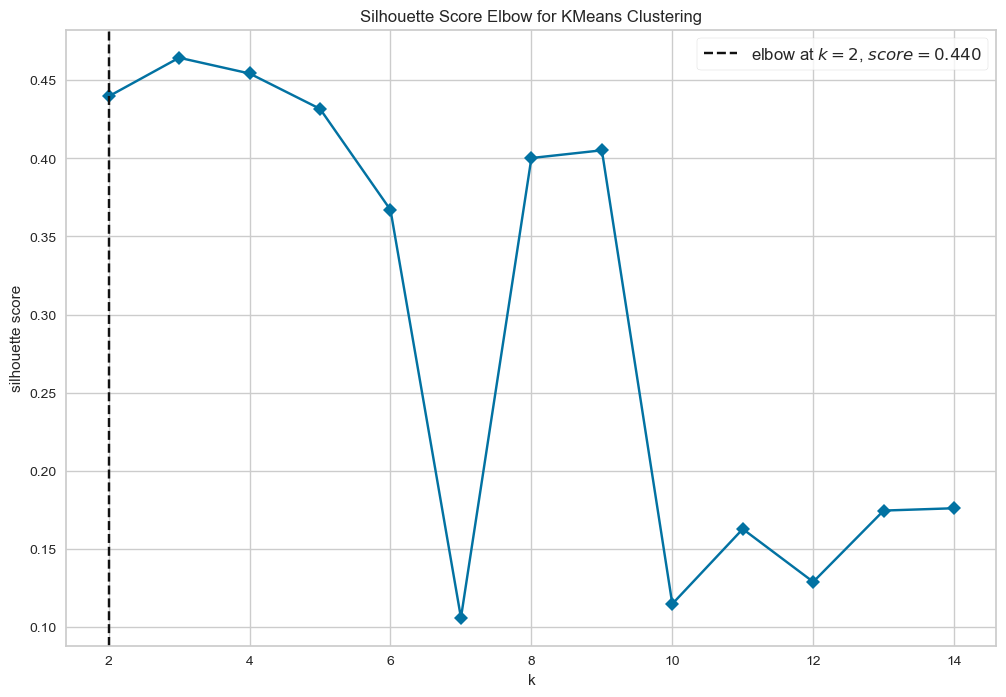

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [58]:
model = KMeans(random_state=1)

fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = KElbowVisualizer(model,
                              k=(2, 15),
                              timings=False,
                              metric='silhouette',
                              fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

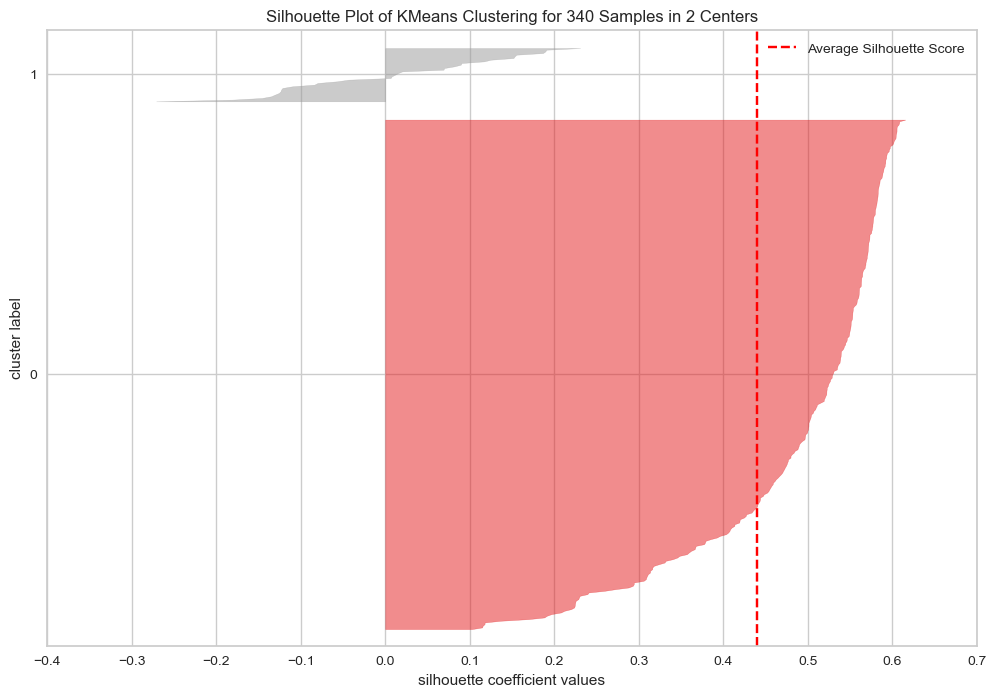

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# finding optimal no. of clusers with silhouette coefficient
fig, axes = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(2, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

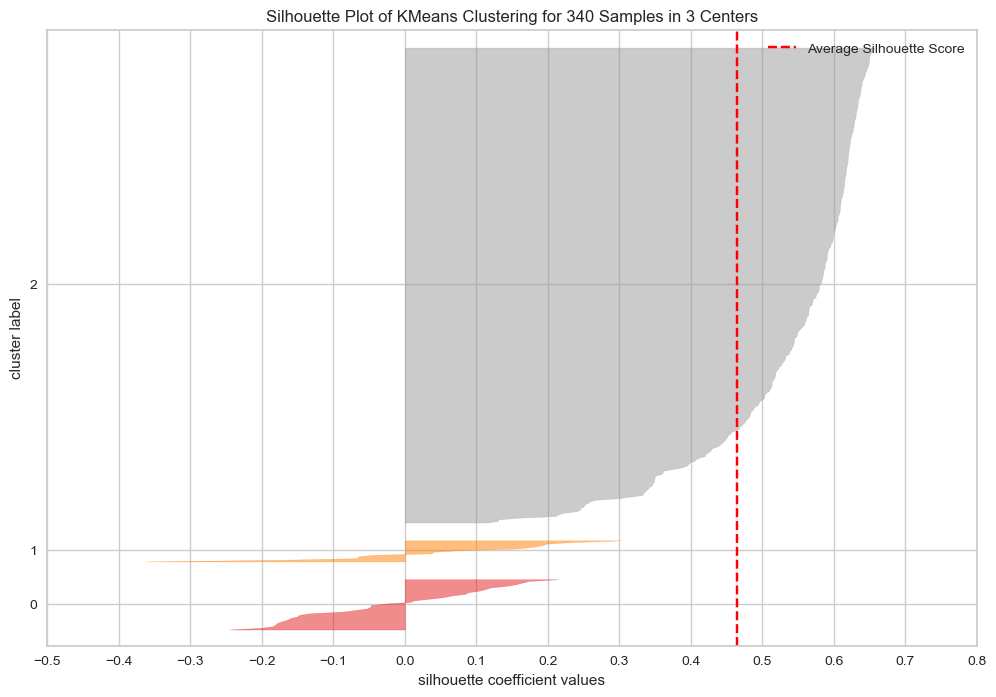

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# finding optimal no. of clusers with silhouette coefficient
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(3, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

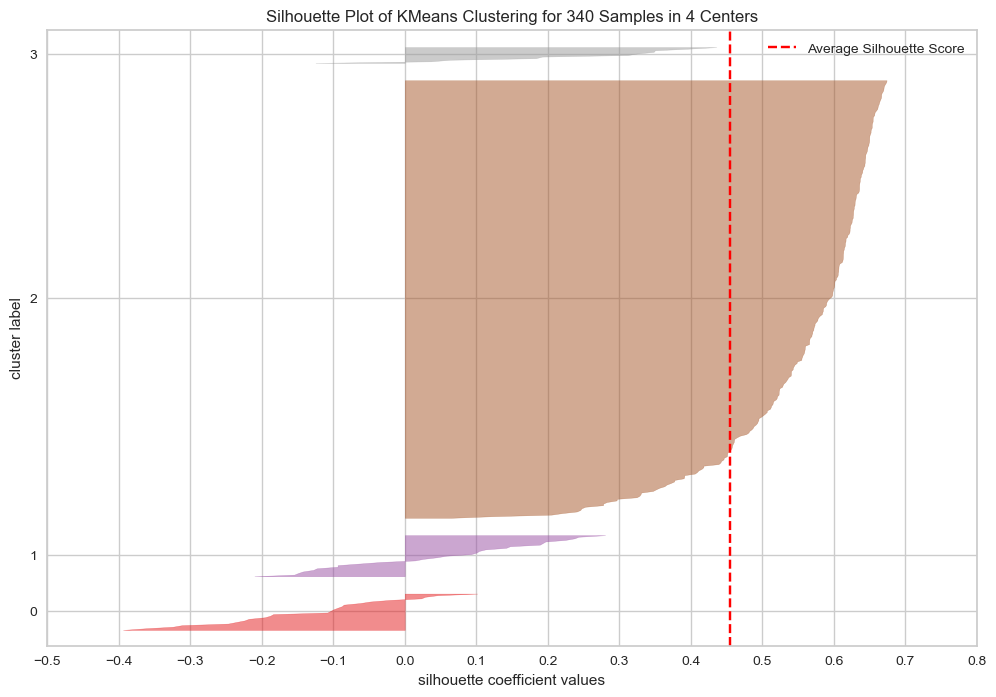

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
# finding optimal no. of clusers with silhouette coefficient
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

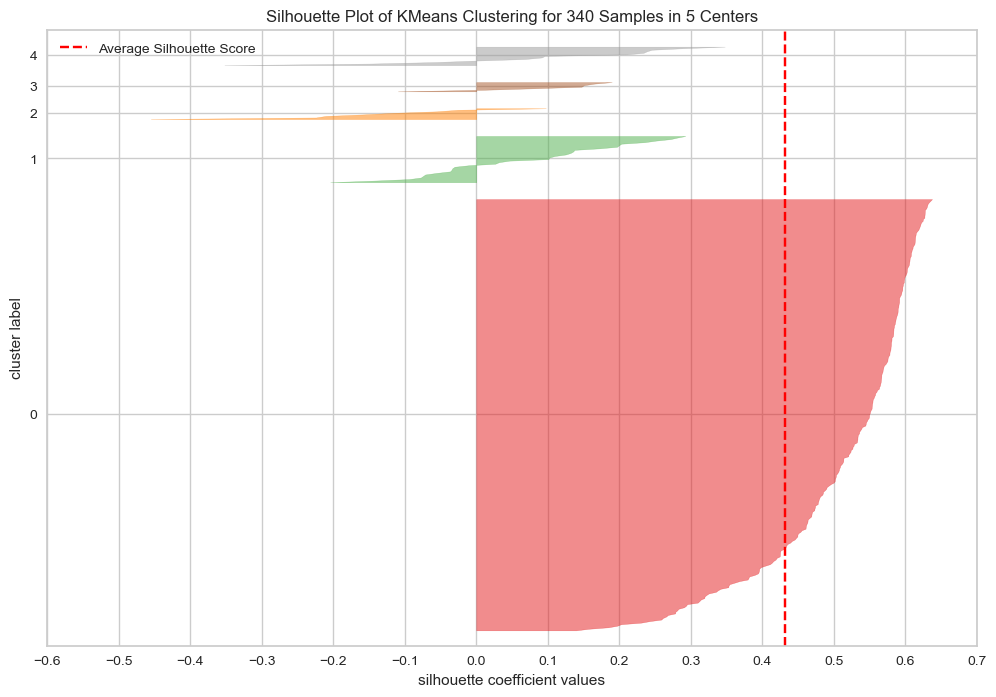

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
# finding optimal no. of clusers with silhouette coefficient
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(5, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

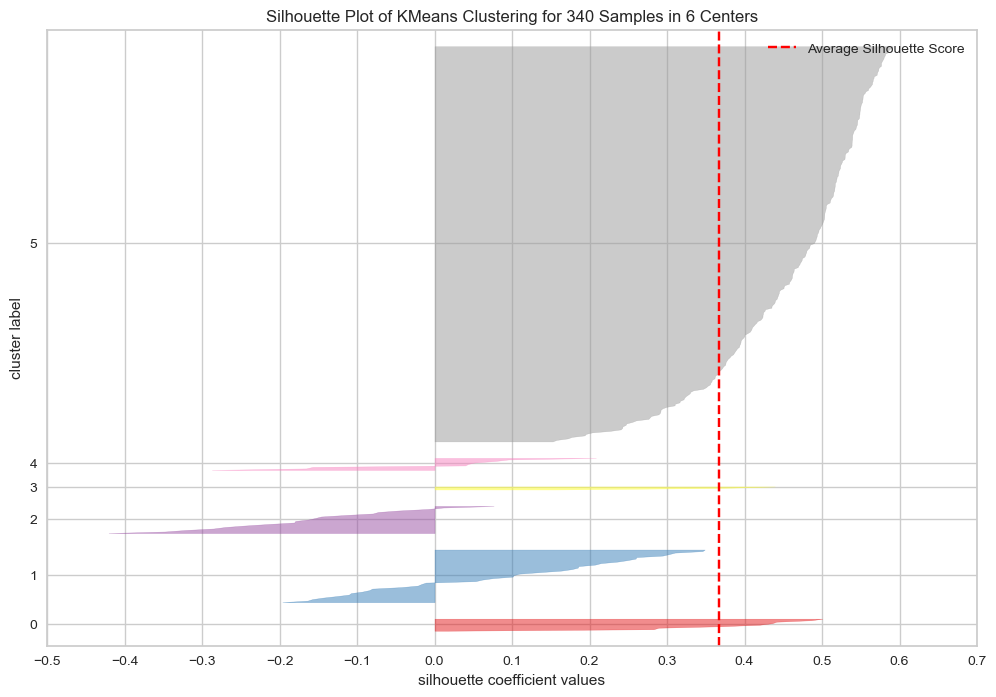

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
# finding optimal no. of clusers with silhouette coefficient
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(6, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

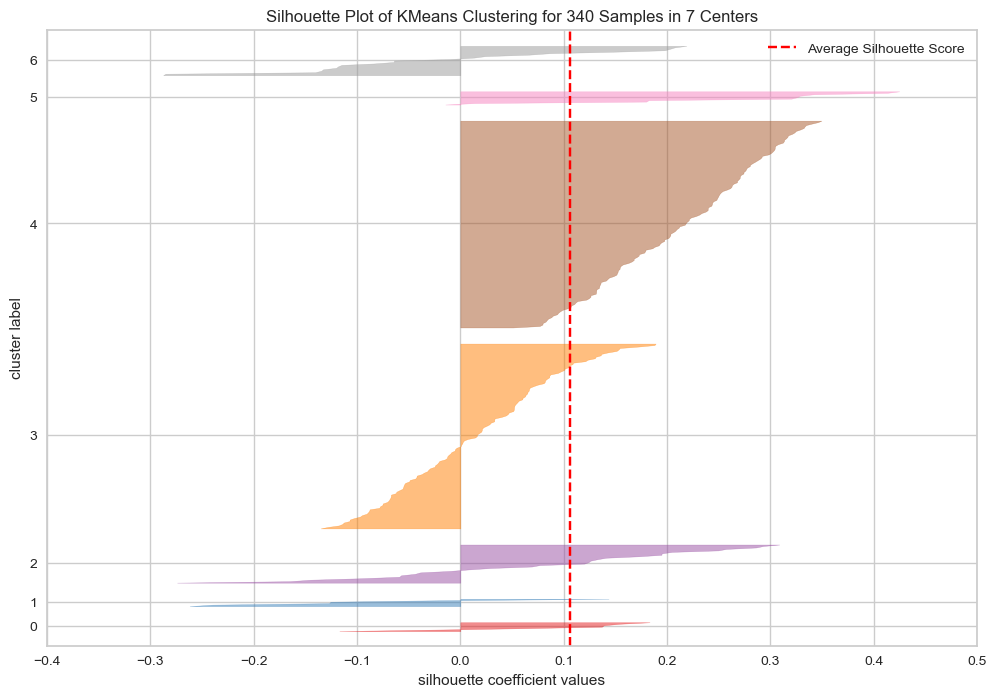

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
# finding optimal no. of clusers with silhouette coefficient
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

visualizer = SilhouetteVisualizer(KMeans(7, random_state=1),
                                  fig=fig)

visualizer.fit(k_means_df)
# fit the data to the visualizer

visualizer.show()
# finalize and render the figure

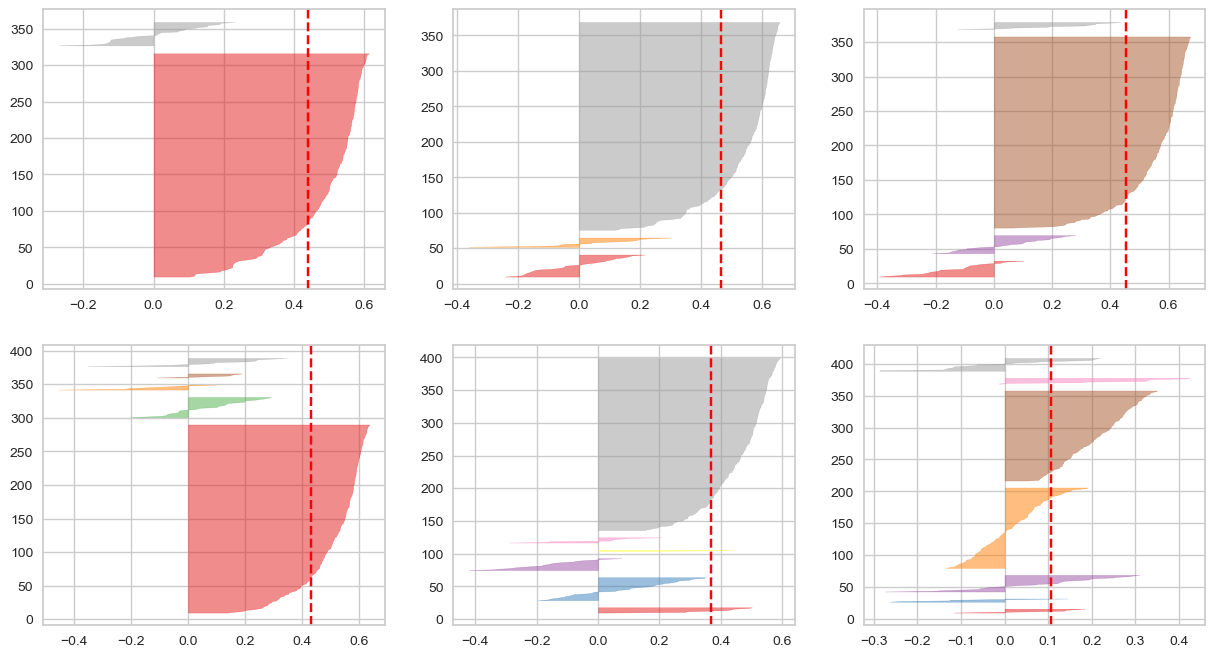

In [65]:
# from KMeans 2 to 7, plot the visualizer together

fig, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=100)

for i in range(2, 8):
    visualizer = SilhouetteVisualizer(KMeans(i, random_state=1), ax=axes.flat[i - 2])
    visualizer.fit(k_means_df)

**Observations**

- For 4 clusters, there is a nick in the elbow plot and the silhouette score is high too.
- So, we will move ahead with k=4.

### K-Means Clustering with k=4
### Create the final model

In [66]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [67]:
data_1 = data.copy()

k_means_df['KM_segments'] = kmeans.labels_
data_1['KM_segments'] = kmeans.labels_

### Analyze the segments

In [68]:
km_cluster_profile = data_1.groupby('KM_segments').mean()

TypeError: Could not convert ADIADSALXNAMGNAMZNBIIBCELGCMGEQIXEWFBFSLRFTRHALISRGMCDMNSTPCLNREGNTRIPVRTXWATWYNNYHOO to numeric

In [ ]:
km_cluster_profile['count_in_each_segment'] = (data_1.groupby('KM_segments')['Security'].count().values)

In [ ]:
km_cluster_profile

In [ ]:
for cl in data_1['KM_segments'].unique():
    print('Cluster {}:'.format(cl))
    print(data_1[data_1['KM_segments'] == cl]['Security'].values)
    print('')

In [ ]:
data_1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

In [ ]:
plt.figure(figsize=(20, 20), dpi=100)
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data_1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**
    - There are 277 companies in this cluster.
    - The stocks of the companies in this cluster have a moderate price, low volatility, and have witnessed a 5% price rise on average.
    - These companies have a low cash ratio and low positive net income.
    - These companies have a low P/E ratio and a low number of outstanding shares.


- **Cluster 1**
    - There are 11 companies in this cluster.
    - The stocks of the companies in this cluster have a low price, low volatility, and have witnessed a 6% price rise on average.
    - These companies have a low cash ratio and high positive net income.
    - These companies have a low P/E ratio and a high number of outstanding shares.


- **Cluster 2**
    - There are 27 companies in this cluster.
    - The stocks of the companies in this cluster have a low price, high volatility, and have witnessed an 15% price drop on average.
    - These companies have a low cash ratio and negative net income.
    - These companies have a high P/E ratio and a low number of outstanding shares.


- **Cluster 3**
    - There are 25 companies in this cluster.
    - The stocks of the companies in this cluster have a high price, moderate volatility, and have witnessed a 13.5% price rise on average.
    - These companies have a high cash ratio and low positive net income.
    - These companies have a moderate P/E ratio and low to moderate number of outstanding shares.

## Hierarchical Clustering

### Computing Cophenetic Correlation Coefficient

In [ ]:
hc_df = subset_scaled.copy()

In [ ]:
# list of distance metrics
distance_metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock', 'cosine']

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'weighted']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))

        print(
            'Cophenetic Correlation Coefficient for {} distance metric and {} linkage method: {}'.format(
                dm.capitalize(),
                lm,
                c
            )
        )

        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# print the highest cophenetic correlation coefficient
print('----------------------DIVIDED-------------------------')

print(
    'Highest Cophenetic Correlation Coefficient: {} for {} distance metric and {} linkage method'.format(
        high_cophenet_corr,
        high_dm_lm[0].capitalize(),
        high_dm_lm[1]
    )
)

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*' * 100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


### Checking Dendrograms

In [ ]:
# list of Linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward', 'weighted']

# list to save results of cophenetic correlation calculation
cophenetic_corr = ['Linkage', 'Cophenetic Correlation Coefficient']
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30), dpi=100)

# We will enumerate through the list of linkage methods and plot the dendrogram for each
# For each linkage method, we will calculate the cophenetic correlation coefficient and save it in a list

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title('Dendrogram for {} Linkage'.format(method.capitalize()))

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))

    axs[i].annotate(
        'Cophenetic Correlation: {:.2f}'.format(coph_corr),
        xy=(0.8, 0.8),
        xycoords='axes fraction'
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare the cophenetic correlation coefficient for each linkage method

df_cc = pd.DataFrame(compare, columns=cophenetic_corr)
df_cc = df_cc.sort_values(by='Cophenetic Correlation Coefficient')

df_cc

**Let's move ahead with 3 clusters, Euclidean distance, and average linkage.**

### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

In [ ]:
data_2 = data.copy()

hc_df['HC_segments'] = HCmodel.labels_
data_2['HC_segments'] = HCmodel.labels_

### Analyze the segments

In [ ]:
hc_cluster_profile = data_2.groupby('HC_segments').mean()

In [ ]:
hc_cluster_profile['count_in_each_segment'] = (data_2.groupby('HC_segments')['Security'].count().values)

In [ ]:
hc_cluster_profile

In [ ]:
for cl in data_2['HC_segments'].unique():
    print('Cluster {}:'.format(cl))
    print(data_2[data_2['HC_segments'] == cl]['Security'].values)
    print('')

**We see that there is one single company cluster, one cluster of two companies, and all other companies have been grouped into one cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

### Creating Final Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
HCmodel.fit(hc_df)

In [ ]:
data_2 = data.copy()

hc_df['HC_segments'] = HCmodel.labels_
data_2['HC_segments'] = HCmodel.labels_

### Analyze the segments

In [ ]:
hc_cluster_profile = data_2.groupby('HC_segments').mean()

In [ ]:
hc_cluster_profile['count_in_each_segment'] = (data_2.groupby('HC_segments')['Security'].count().values)

In [ ]:
hc_cluster_profile

In [ ]:
for cl in data_2['HC_segments'].unique():
    print('Cluster {}:'.format(cl))
    print(data_2[data_2['HC_segments'] == cl]['Security'].values)
    print('')

**The clusters look better now. Let's check the cluster profiles.**

In [ ]:
data_2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data_2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights


- **Cluster 0**
    - There are 29 companies in this cluster.
    - The stocks of the companies in this cluster have a low price, high volatility, and have witnessed an 11% price drop on average.
    - These companies have a low cash ratio and negative net income.
    - These companies have a high P/E ratio and a low number of outstanding shares.


- **Cluster 1**
    - There are 15 companies in this cluster.
    - The stocks of the companies in this cluster have a high price, moderate volatility, and have witnessed a 10.5% price rise on average.
    - These companies have a high cash ratio and low positive net income.
    - These companies have a high P/E ratio and a low number of outstanding shares.


- **Cluster 2**
    - There are 11 companies in this cluster.
    - The stocks of the companies in this cluster have a low price, low volatility, and have witnessed a 6% rise drop on average.
    - These companies have a moderate cash ratio and high positive net income.
    - These companies have a low P/E ratio and a high number of outstanding shares.


- **Cluster 3**
    - There are 285 companies in this cluster.
    - The stocks of the companies in this cluster have a moderate price, low volatility, and have witnessed a 5% price rise on average.
    - These companies have a moderate cash ratio and moderate positive net income.
    - These companies have a moderate P/E ratio and a low number of outstanding shares.

## K-means vs Hierarchical Clustering

- Both K-means and Hierarchical clustering yield two similar clusters and two slightly dissimilar clusters.
- Few companies were swapped between the clusters obtained using both techniques.
- The sklearn implementations of both the techniques take nearly the same amount of time to execute. However, dendrograms in Hierarchical clustering take a more time to render.

**We will move ahead with the clusters obtained using Hierarchical clustering.**

In [ ]:
hc_cluster_profile

In [ ]:
data_2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

## Actionable Insights and Recommendations

- **Cluster 0** companies are the ones who performed poorly in the previous quarter. Most of the companies in this cluster are from the Energy sector, which as a whole performed poorly in the previous quarter. Investors will have to be careful and dig deeper into the financial statements of these companies for a better analysis.

- **Cluster 1** companies have highly-priced stocks and have shown the most growth in the previous quarter. Large proportions of stocks in this cluster are from Healthcare and IT sectors. The high earnings per share also indicate that these stocks will justify their high price tag with good returns. The high P/E ratio indicates that these stocks are either overvalued or investors expect good growth potential from these companies.


- **Cluster 2** companies are the ones which have a low price and have had a great previous quarter. They are less riskier investments and are traded in large volumes. The low P/E ratio might also indicate that these stocks are undervalued, but we will have to dig deeper to conclude the same with confidence.


- **Cluster 3** company stocks are moderately priced and are less volatile. They had a good previous quarter and their stocks are traded in moderate volumes. The moderate earnings per share also indicate that these stocks will yield good returns.


- Trade&Ahead should look into more financial (fundamental and technical) indicators to make better predictions of stock price movements and assessment of company valuation.


- They should also conduct cluster analysis separately for each of the economic sectors as it will help them to provide better investment recommendations to their clients.

## Add-on: PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_reduced_pca = pca.fit_transform(subset_scaled)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(data=X_reduced_pca, columns=['Component 1', 'Component 2', 'C3', 'C4', 'C5', 'C6'])

# checking the amount of variance explained
print(
    f'The first two principal components explain {np.round(100 * pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data.')

In [ ]:
X_reduced_pca

In [ ]:
# plotting the scatterplot of the reduced data
plt.figure(figsize=(12, 8), dpi=100)

sns.scatterplot(data=reduced_data_df_pca, x='Component 1', y='Component 2')

plt.title('Scatterplot of the Reduced Data', fontsize=15, weight='bold')

plt.show()

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)

sns.scatterplot(data=reduced_data_df_pca, x='Component 1', y='Component 2', hue=data_2["HC_segments"],
                palette='rainbow')

plt.title('Scatterplot of the Reduced Data', fontsize=15, weight='bold')

plt.show()

- The clusters are not very well separated.
- Cluster 3 points are concentrated in the middle of the plot and points from the rest of the clusters surround them in three different directions.